# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import pycountry
from scipy.stats import linregress

# Get today's date
d = datetime.datetime.today()
date = d.strftime('%m-%d-%Y')
print(f"Today is {date}")

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Today is 01-22-2020


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    countrycode = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    countryobj = pycountry.countries.get(alpha_2=countrycode.upper())
    country = countryobj.name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        # break at 600 so hopefully we have 500 that hit on the weather api
        if len(cities) == 600:
            break

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# initialize empty dataframe
cityWeatherDF = pd.DataFrame()

# loop through the cities list to get the information and append to main dataframe
for city, country in zip(cities,countries):
    response = requests.get(f"{query_url}{city},{country}").json()
    try:
        respDF = pd.DataFrame({"City":[city],
                               "Country":country,
                           "Cloudiness":response['clouds']['all'],
                           'Date':response['dt'],
                           'Humidity':response['main']['humidity'],
                           'Lat':response['coord']['lat'],
                           'Lng':response['coord']['lon'],
                           'Max Temp':response['main']['temp_max'],
                           'Wind Speed':response['wind']['speed']
                          })
        
        cityWeatherDF = cityWeatherDF.append(respDF, ignore_index=True)
        print(f"Done with {city},{country} number {cities.index(city) + 1} of {len(cities)}")
    except (KeyError):
        print(f"Can't find {city}, {country}. Skipping city")

Done with gao,Mali number 1 of 600
Done with mar del plata,Argentina number 2 of 600
Done with yerbogachen,Russian Federation number 3 of 600
Done with dicabisagan,Philippines number 4 of 600
Done with albany,Australia number 5 of 600
Done with tasiilaq,Greenland number 6 of 600
Done with east london,South Africa number 7 of 600
Done with am timan,Chad number 8 of 600
Done with saint-philippe,Réunion number 9 of 600
Done with cape town,South Africa number 10 of 600
Done with yicheng,China number 11 of 600
Done with mundgod,India number 12 of 600
Done with nangwa,Tanzania, United Republic of number 13 of 600
Done with punta arenas,Chile number 14 of 600
Done with cherskiy,Russian Federation number 15 of 600
Done with touros,Brazil number 16 of 600
Done with weligama,Sri Lanka number 17 of 600
Done with tiksi,Russian Federation number 18 of 600
Done with san cristobal,Ecuador number 19 of 600
Can't find amderma, Russian Federation. Skipping city
Can't find nizhneyansk, Russian Federation

Done with bambanglipuro,Indonesia number 170 of 600
Done with moelv,Norway number 171 of 600
Done with ust-kuyga,Russian Federation number 172 of 600
Done with angoram,Papua New Guinea number 173 of 600
Can't find buqayq, Saudi Arabia. Skipping city
Done with camacha,Portugal number 175 of 600
Done with chingola,Zambia number 176 of 600
Done with severnyy-kospashskiy,Russian Federation number 177 of 600
Done with hualmay,Peru number 178 of 600
Done with kingman,United States number 179 of 600
Can't find saleaula, Samoa. Skipping city
Done with broome,Australia number 181 of 600
Can't find viligili, Maldives. Skipping city
Done with bethel,United States number 183 of 600
Done with klaksvik,Faroe Islands number 184 of 600
Done with myaundzha,Russian Federation number 185 of 600
Done with conde,Brazil number 186 of 600
Done with coquimbo,Chile number 187 of 600
Done with bairiki,Kiribati number 188 of 600
Done with opuwo,Namibia number 189 of 600
Done with tura,Russian Federation number 1

Done with vila velha,Brazil number 338 of 600
Done with palauig,Philippines number 339 of 600
Can't find samusu, Samoa. Skipping city
Done with bukachacha,Russian Federation number 341 of 600
Done with zeya,Russian Federation number 342 of 600
Done with praia da vitoria,Portugal number 343 of 600
Can't find malangali, Tanzania, United Republic of. Skipping city
Done with zharkent,Kazakhstan number 345 of 600
Done with koygorodok,Russian Federation number 346 of 600
Done with chhapar,India number 347 of 600
Done with axim,Ghana number 348 of 600
Done with gunjur,Gambia number 349 of 600
Done with itaueira,Brazil number 350 of 600
Done with souillac,Mauritius number 351 of 600
Done with kroya,Indonesia number 352 of 600
Done with sacalum,Mexico number 353 of 600
Done with alekseyevsk,Russian Federation number 354 of 600
Done with gua musang,Malaysia number 355 of 600
Done with narayanganj,Bangladesh number 356 of 600
Done with dakar,Senegal number 357 of 600
Done with kodinar,India numbe

Done with meadow lake,Canada number 510 of 600
Done with khorixas,Namibia number 511 of 600
Done with ilulissat,Greenland number 512 of 600
Done with lagoa,Portugal number 513 of 600
Done with jutai,Brazil number 514 of 600
Done with tessalit,Mali number 515 of 600
Done with jiaozhou,China number 516 of 600
Done with ahipara,New Zealand number 517 of 600
Done with sao sepe,Brazil number 518 of 600
Done with sandwick,United Kingdom number 519 of 600
Done with mumbwa,Zambia number 520 of 600
Done with kloulklubed,Palau number 521 of 600
Done with biak,Indonesia number 522 of 600
Done with qaqortoq,Greenland number 523 of 600
Done with kenora,Canada number 524 of 600
Done with key west,United States number 525 of 600
Done with cape coast,Ghana number 526 of 600
Done with bima,Indonesia number 527 of 600
Done with pineville,United States number 528 of 600
Done with oistins,Barbados number 529 of 600
Done with antipino,Russian Federation number 530 of 600
Done with yendi,Ghana number 531 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cityWeatherDF.to_csv("Data/CityWeatherData.csv")
cityWeatherDF.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,gao,Mali,88,1579742459,14,16.64,1.64,76.96,10.58
1,mar del plata,Argentina,75,1579742199,94,-38.00,-57.56,69.80,5.82
2,yerbogachen,Russian Federation,51,1579742460,95,61.28,108.01,-32.91,4.56
3,dicabisagan,Philippines,75,1579742460,78,17.08,122.42,74.57,9.08
4,albany,Australia,1,1579742300,73,42.60,-73.97,27.00,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

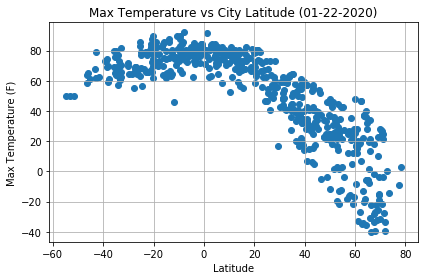

In [5]:
# set x and y values
lat = cityWeatherDF['Lat']
temp = cityWeatherDF['Max Temp']

# plot
plt.scatter(lat,temp)
# label the figure
plt.title(f"Max Temperature vs City Latitude ({date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.tight_layout()
# save the figure
plt.savefig("Figures/MaxTemperatureVsCityLatitude")

#### Latitude vs. Humidity Plot

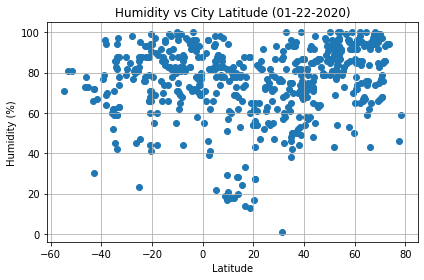

In [6]:
# set x and y values
humid = cityWeatherDF['Humidity']

# plot
plt.scatter(lat,humid)
# label the figure
plt.title(f"Humidity vs City Latitude ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.tight_layout()
# save the figure
plt.savefig("Figures/HumidityVsCityLatitude")

#### Latitude vs. Cloudiness Plot

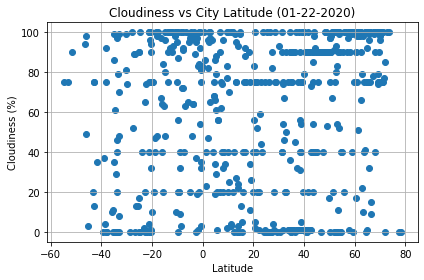

In [7]:
# set x and y values
cloud = cityWeatherDF['Cloudiness']

# plot
plt.scatter(lat,cloud)
# label the figure
plt.title(f"Cloudiness vs City Latitude ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.tight_layout()
# save the figure
plt.savefig("Figures/CloudinessVsCityLatitude")

#### Latitude vs. Wind Speed Plot

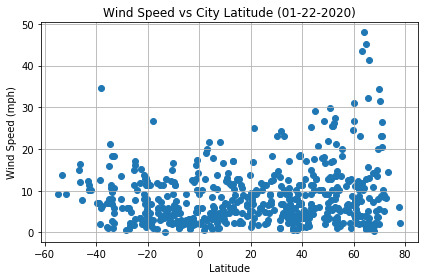

In [8]:
# set x and y values
windspd = cityWeatherDF['Wind Speed']

# plot
plt.scatter(lat,windspd)
# label the figure
plt.title(f"Wind Speed vs City Latitude ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.tight_layout()
# save the figure
plt.savefig("Figures/WindSpeedVsCityLatitude")

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots
def linregressplot(xvalues,yvalues,title,xlabel,ylabel):  
    
    # calculate linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # plot scatter and linear regression
    plt.scatter(xvalues,yvalues)
    plt.plot(xvalues,regress_values,"r-")
    
    # annotate and label the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(min(xvalues) + 1,min(yvalues)+6),fontsize=12,color="red")
    plt.annotate(f"The r-squared is: {round(rvalue,4)}",(min(xvalues) + 1,min(yvalues)+1),fontsize=12,color="red")
    plt.grid()
    plt.tight_layout()
    print(f"The r-squared is {rvalue}")
    

In [10]:
# Create Northern and Southern Hemisphere DataFrames
cityWeatherNHemDF = cityWeatherDF[cityWeatherDF['Lat'] > 0]
cityWeatherSHemDF = cityWeatherDF[cityWeatherDF['Lat'] < 0]
cityWeatherSHemDF.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,mar del plata,Argentina,75,1579742199,94,-38.00,-57.56,69.80,5.82
6,east london,South Africa,99,1579742347,74,-33.02,27.91,70.20,10.56
8,saint-philippe,Réunion,75,1579742378,88,-21.36,55.77,80.60,9.17
9,cape town,South Africa,0,1579742461,59,-33.93,18.42,69.01,8.05
12,nangwa,"Tanzania, United Republic of",100,1579742462,92,-4.50,35.44,62.56,2.55


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is -0.8598110002644598


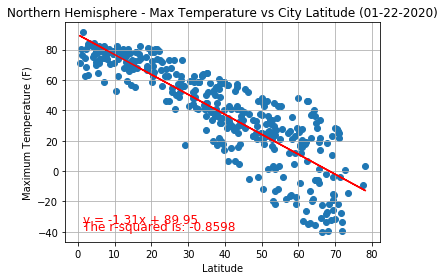

In [11]:
# set parameters and run function
linregressplot(cityWeatherNHemDF['Lat'],cityWeatherNHemDF['Max Temp'],f"Northern Hemisphere - Max Temperature vs City Latitude ({date})","Latitude","Maximum Temperature (F)")
plt.savefig("Figures/NorthernHemisphereMaxTempVsCityLatitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.5644038408598953


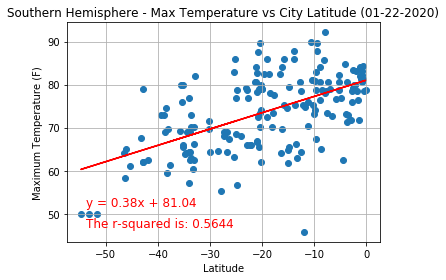

In [12]:
# set parameters and run function
linregressplot(cityWeatherSHemDF['Lat'],cityWeatherSHemDF['Max Temp'],f"Southern Hemisphere - Max Temperature vs City Latitude ({date})","Latitude","Maximum Temperature (F)")
plt.savefig("Figures/SouthernHemisphereMaxTempVsCityLatitude.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.34589720130852153


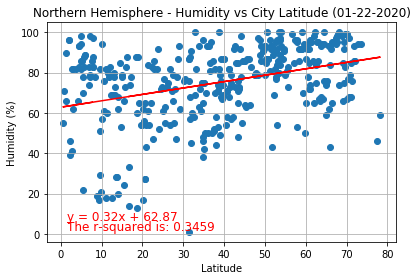

In [13]:
# set parameters and run function
linregressplot(cityWeatherNHemDF['Lat'],cityWeatherNHemDF['Humidity'],f"Northern Hemisphere - Humidity vs City Latitude ({date})","Latitude","Humidity (%)")
plt.savefig("Figures/NorthernHemisphereHumidityVsCityLatitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.23213999174025923


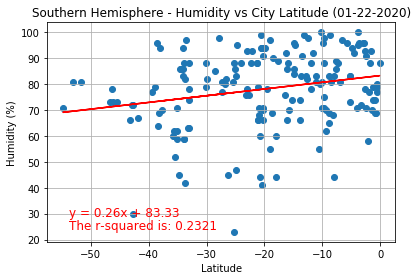

In [14]:
# set parameters and run function
linregressplot(cityWeatherSHemDF['Lat'],cityWeatherSHemDF['Humidity'],f"Southern Hemisphere - Humidity vs City Latitude ({date})","Latitude","Humidity (%)")
plt.savefig("Figures/SouthernHemisphereHumidityVsCityLatitude.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.22154322898452583


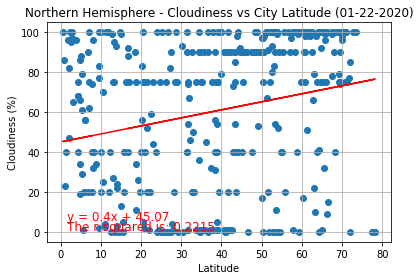

In [15]:
# set parameters and run function
linregressplot(cityWeatherNHemDF['Lat'],cityWeatherNHemDF['Cloudiness'],f"Northern Hemisphere - Cloudiness vs City Latitude ({date})","Latitude","Cloudiness (%)")
plt.savefig("Figures/NorthernHemisphereCloudinessVsCityLatitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.23238894818850028


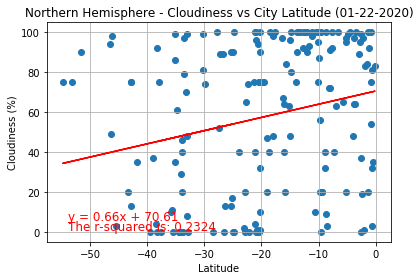

In [16]:
# set parameters and run function
linregressplot(cityWeatherSHemDF['Lat'],cityWeatherSHemDF['Cloudiness'],f"Northern Hemisphere - Cloudiness vs City Latitude ({date})","Latitude","Cloudiness (%)")
plt.savefig("Figures/SouthernHemisphereCloudinessVsCityLatitude.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.19965247424769964


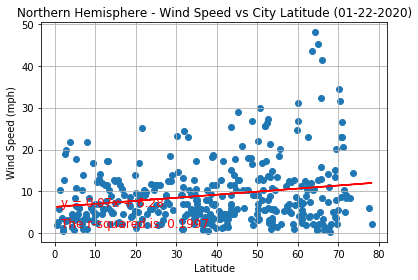

In [17]:
# set parameters and run function
linregressplot(cityWeatherNHemDF['Lat'],cityWeatherNHemDF['Wind Speed'],f"Northern Hemisphere - Wind Speed vs City Latitude ({date})","Latitude","Wind Speed (mph)")
plt.savefig("Figures/NorthernHemisphereWindSpeedVsCityLatitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is -0.2694861529767192


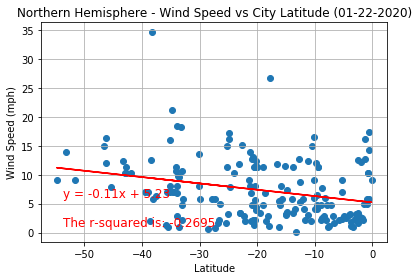

In [18]:
# set parameters and run function
linregressplot(cityWeatherSHemDF['Lat'],cityWeatherSHemDF['Wind Speed'],f"Northern Hemisphere - Wind Speed vs City Latitude ({date})","Latitude","Wind Speed (mph)")
plt.savefig("Figures/SouthernHemisphereWindSpeedVsCityLatitude.png")